In [1]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Preview
df.head()


VIN (1-10)    County      City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB6K      King   Seattle    WA      98178.0        2019  TESLA   
1  5YJYGAEE5M    Yakima     Selah    WA      98942.0        2021  TESLA   
2  5YJSA1E65N    Yakima   Granger    WA      98932.0        2022  TESLA   
3  5YJ3E1EBXN      King  Bellevue    WA      98004.0        2022  TESLA   
4  JM3KKEHA8S  Thurston      Yelm    WA      98597.0        2025  MAZDA   

     Model                   Electric Vehicle Type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1  MODEL Y          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3  MODEL 3          Battery Electric Vehicle (BEV)   
4    CX-90  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2  Eligibility unknown as battery range has not b...             0.0   
3  Eligibility unknown as battery range has not b...             0.0   
4              Not eligible due to low battery range            26.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  37.0       101250425   
1        0.0                  15.0       224162858   
2        0.0                  15.0       187279214   
3        0.0                  41.0       219428079   
4        0.0                   2.0       277791643   

              Vehicle Location                               Electric Utility  \
0  POINT (-122.23825 47.49461)   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
1  POINT (-120.53145 46.65405)                                     PACIFICORP   
2   POINT (-120.1871 46.33949)                                     PACIFICORP   
3   POINT (-122.1872 47.61001)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   
4  POINT (-122.60735 46.94239)                         PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.303301e+10  
1       5.307700e+10  
2       5.307700e+10  
3       5.303302e+10  
4       5.306701e+10

## Initial Cleaning

In [2]:
# Copy and clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Drop unnecessary columns
df.drop(columns=['vin_1-10', 'vehicle_location', 'dol_vehicle_id'], inplace=True)

# Convert ZIP code and census tract to strings
df['postal_code'] = df['postal_code'].astype('Int64').astype(str)
df['2020_census_tract'] = df['2020_census_tract'].astype('Int64').astype(str)

# Drop rows with nulls and remove duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


vin_1-10                                             0
county                                               4
city                                                 4
state                                                0
postal_code                                          4
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_cafv_eligibility      0
electric_range                                      17
base_msrp                                           17
legislative_district                               540
dol_vehicle_id                                       0
vehicle_location                                    11
electric_utility                                     4
2020_census_tract                                    4
dtype: int64
vin_1-10                                            

## EDA (Exploratory Data Analysis)

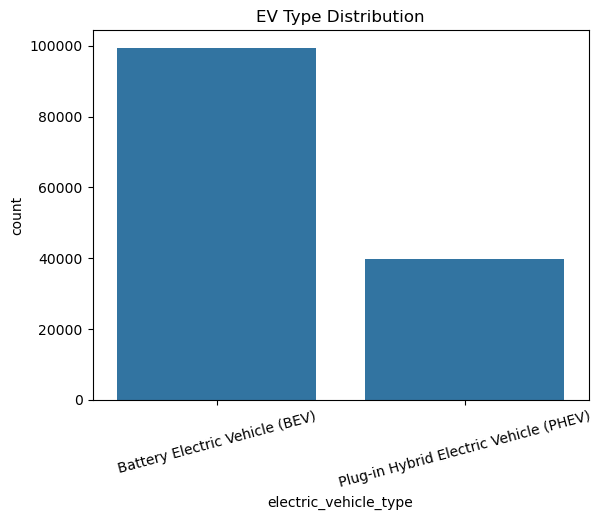

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: EV Type Distribution
sns.countplot(data=df, x='electric_vehicle_type')
plt.xticks(rotation=15)
plt.title("EV Type Distribution")
plt.show()


1. Model Year Distribution

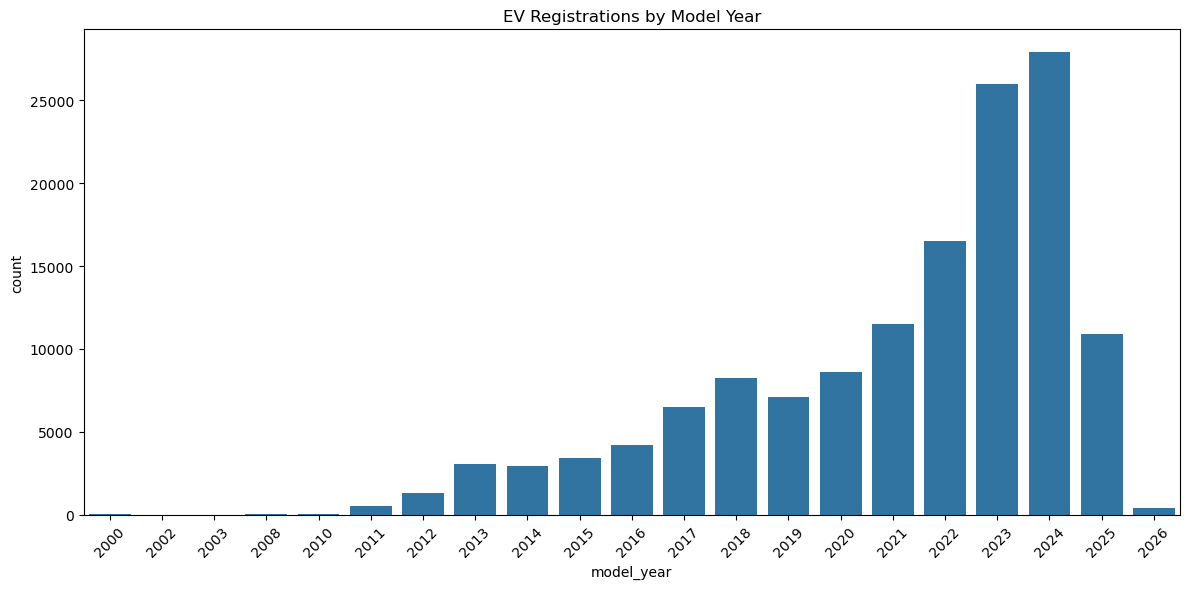

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='model_year', order=sorted(df['model_year'].unique()))
plt.title("EV Registrations by Model Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Electric Range Histogram

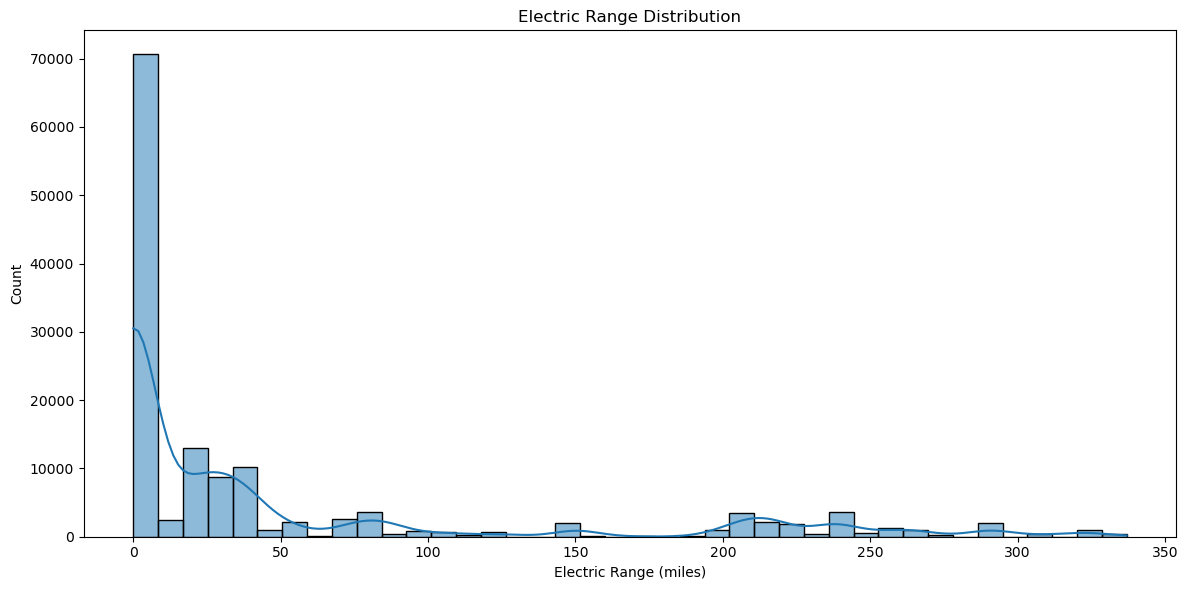

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['electric_range'], bins=40, kde=True)
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range (miles)")
plt.tight_layout()
plt.show()


3. Base MSRP Boxplot (with outliers visible)

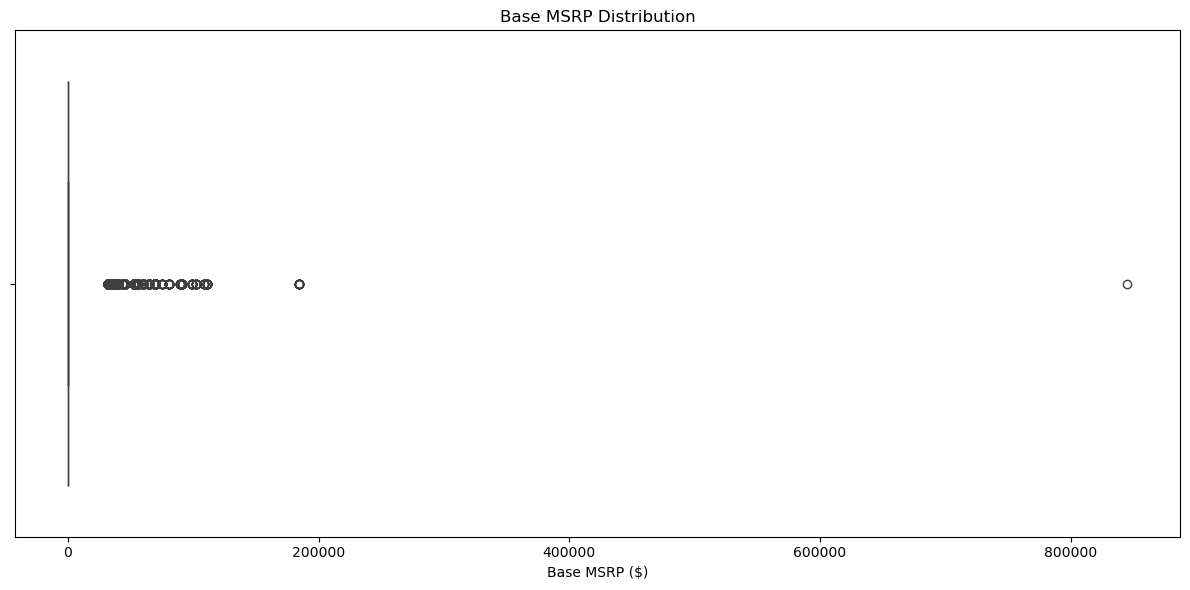

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['base_msrp'])
plt.title("Base MSRP Distribution")
plt.xlabel("Base MSRP ($)")
plt.tight_layout()
plt.show()


4. Top 10 EV Makes (bar chart)

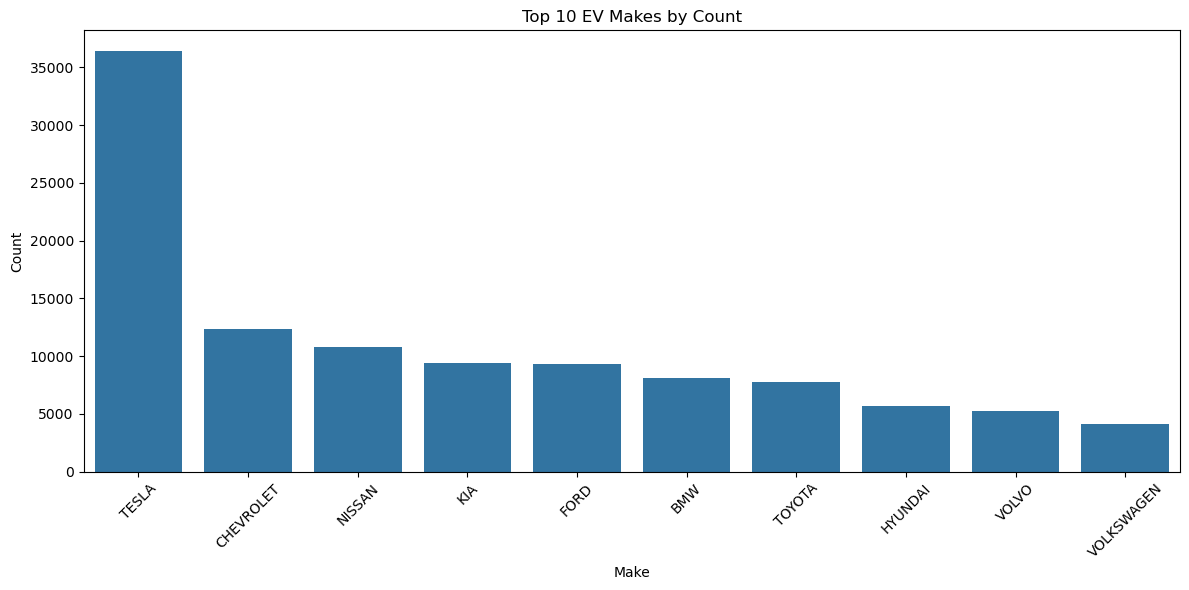

In [7]:
top_makes = df['make'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 10 EV Makes by Count")
plt.ylabel("Count")
plt.xlabel("Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Enhanced EDA Visualizations 

1. Model Year Distribution

C:\Users\rahul\AppData\Local\Temp\ipykernel_19840\2601490879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='model_year', order=order, palette='Set2')


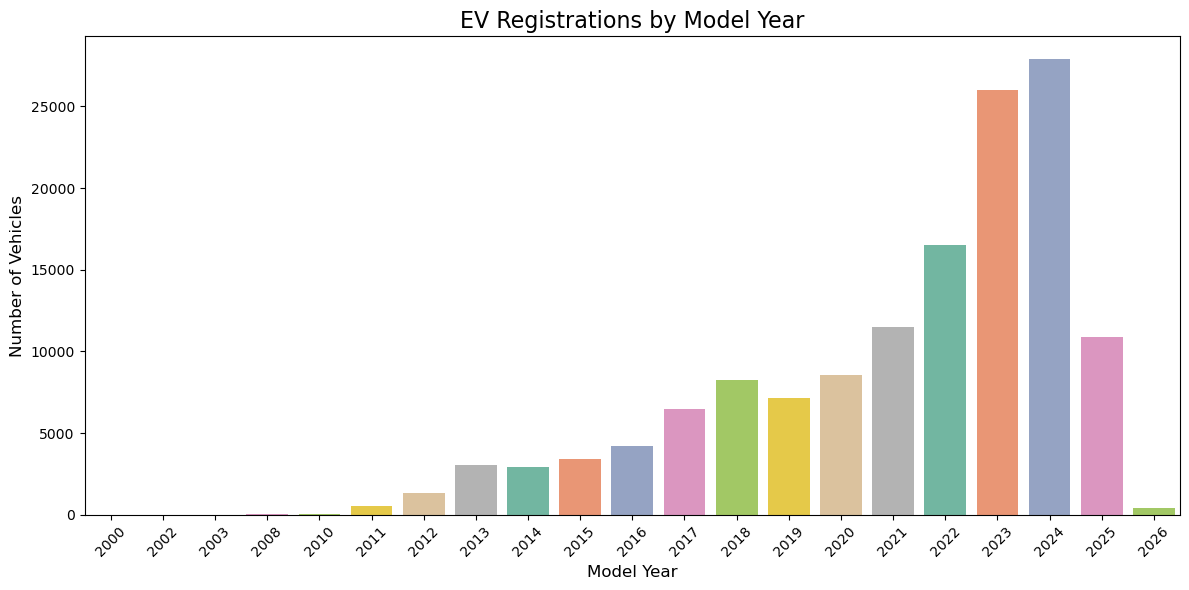

In [8]:
plt.figure(figsize=(12, 6))
order = sorted(df['model_year'].unique())
sns.countplot(data=df, x='model_year', order=order, palette='Set2')

plt.title("EV Registrations by Model Year", fontsize=16)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_year_distribution.png")  # Save as image
plt.show()


2. Electric Range Histogram

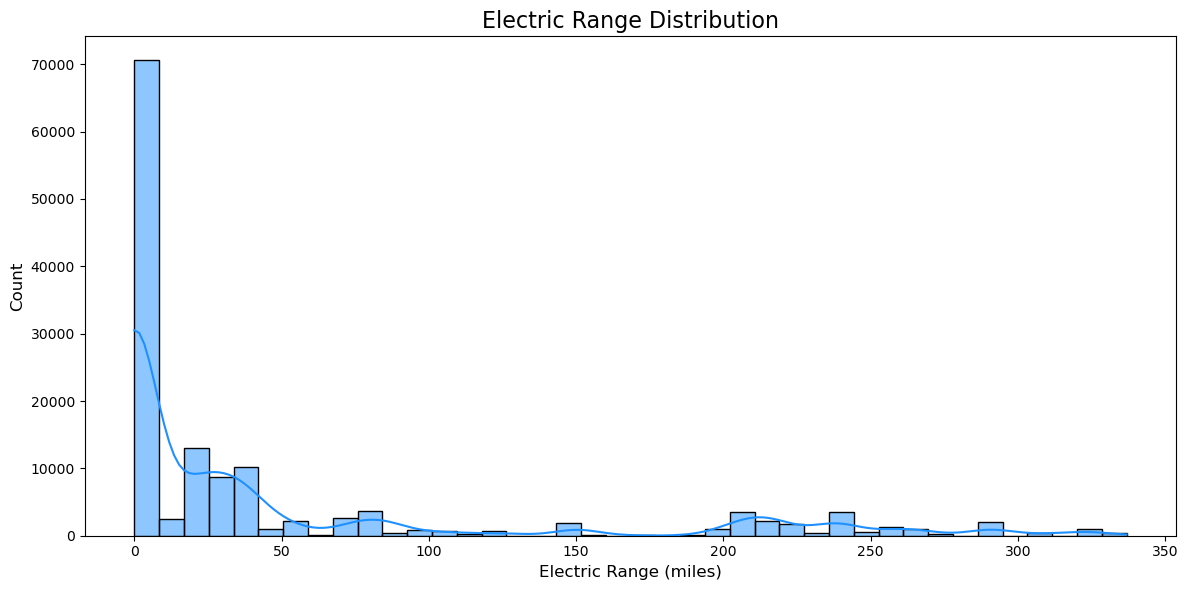

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['electric_range'], bins=40, kde=True, color='dodgerblue')

plt.title("Electric Range Distribution", fontsize=16)
plt.xlabel("Electric Range (miles)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.savefig("electric_range_distribution.png")
plt.show()


3. Base MSRP Boxplot

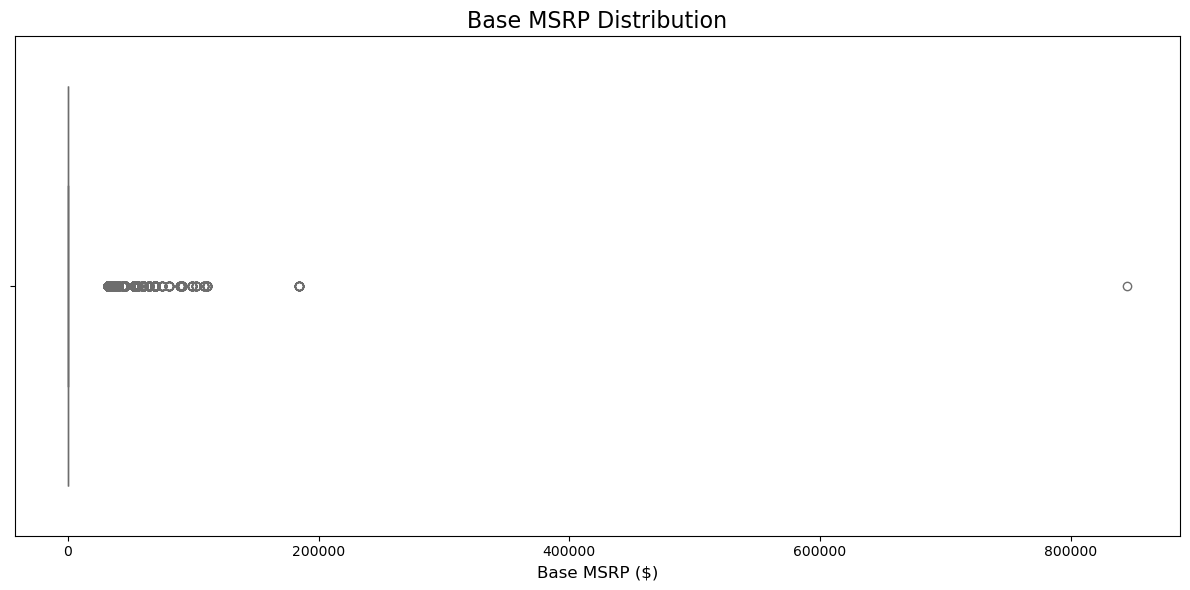

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['base_msrp'], color='salmon')

plt.title("Base MSRP Distribution", fontsize=16)
plt.xlabel("Base MSRP ($)", fontsize=12)
plt.tight_layout()
plt.savefig("base_msrp_boxplot.png")
plt.show()


4. Top 10 EV Makes

C:\Users\rahul\AppData\Local\Temp\ipykernel_19840\117253704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='Set1')


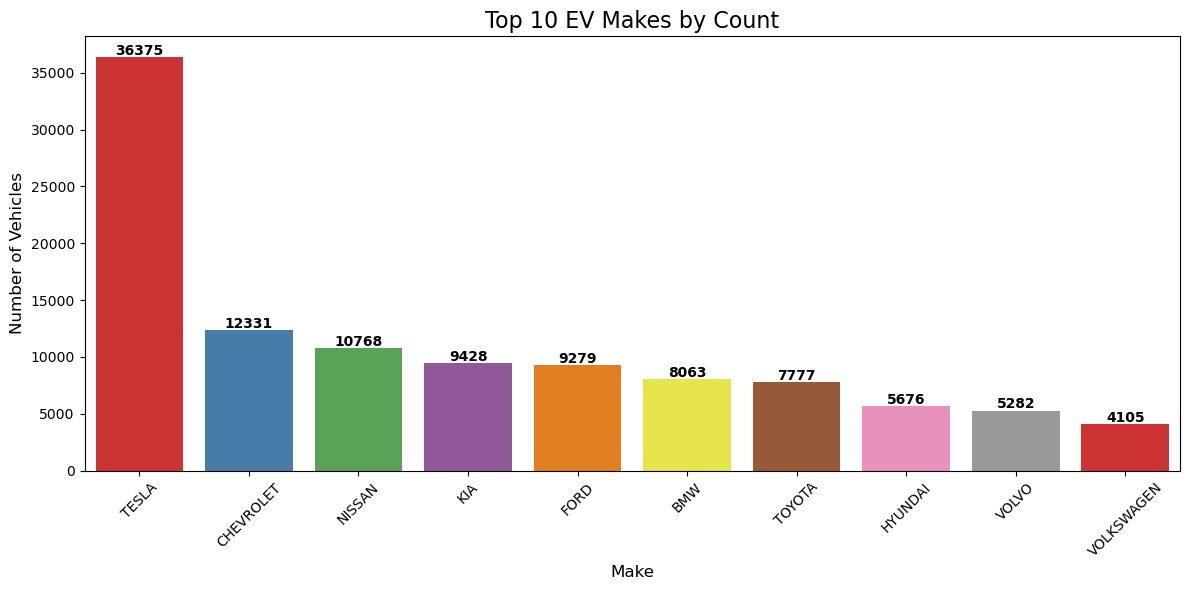

In [12]:
top_makes = df['make'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='Set1')

plt.title("Top 10 EV Makes by Count", fontsize=16)
plt.xlabel("Make", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)

# Annotate bar values
for i, v in enumerate(top_makes.values):
    plt.text(i, v + 200, str(v), ha='center', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_ev_makes.png")
plt.show()


# Outlier Handling

In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

df = remove_outliers_iqr(df, 'electric_range')
df = remove_outliers_iqr(df, 'base_msrp')


# Feature Selection

In [14]:
# Keep only useful features (drop high-cardinality ones like 'model')
df_model = df[[
    'model_year', 'electric_range', 'base_msrp',
    'make', 'electric_utility',
    'clean_alternative_fuel_vehicle_cafv_eligibility',
    'electric_vehicle_type'  # Target
]]


# Encoding

Rebuild df_model correctly — include the target column

In [17]:
df_model = df[[
    'model_year',
    'electric_range',
    'base_msrp',
    'make',
    'electric_utility',
    'clean_alternative_fuel_vehicle_cafv_eligibility',
    'electric_vehicle_type'  # this is your target
]].copy()


apply encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column
le = LabelEncoder()
df_model.loc[:, 'ev_type_encoded'] = le.fit_transform(df_model['electric_vehicle_type'])

# One-hot encode other categorical columns
df_model = pd.get_dummies(
    df_model,
    columns=[
        'make',
        'electric_utility',
        'clean_alternative_fuel_vehicle_cafv_eligibility'
    ],
    drop_first=True
)

# Drop the original target (now encoded)
df_model.drop(columns='electric_vehicle_type', inplace=True)


# Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns='ev_type_encoded')
y = df_model['ev_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Model Training

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15212
           1       1.00      1.00      1.00      7670

    accuracy                           1.00     22882
   macro avg       1.00      1.00      1.00     22882
weighted avg       1.00      1.00      1.00     22882

[[15211     1]
 [    0  7670]]


# Compare Multiple Models
We’ll evaluate:

Logistic Regression

Random Forest

Gradient Boosting

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))



📊 Logistic Regression Results:
Accuracy: 0.9935757363866795
F1 Score: 0.9935764622665938
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15212
           1       0.99      0.99      0.99      7670

    accuracy                           0.99     22882
   macro avg       0.99      0.99      0.99     22882
weighted avg       0.99      0.99      0.99     22882


📊 Random Forest Results:
Accuracy: 0.99995629752644
F1 Score: 0.9999562982325612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15212
           1       1.00      1.00      1.00      7670

    accuracy                           1.00     22882
   macro avg       1.00      1.00      1.00     22882
weighted avg       1.00      1.00      1.00     22882


📊 Gradient Boosting Results:
Accuracy: 0.99995629752644
F1 Score: 0.9999562982325612
              precision    recall  f1-score   support

           0       1.00      1.00

Plot ROC Curve (for Binary Classification Only)

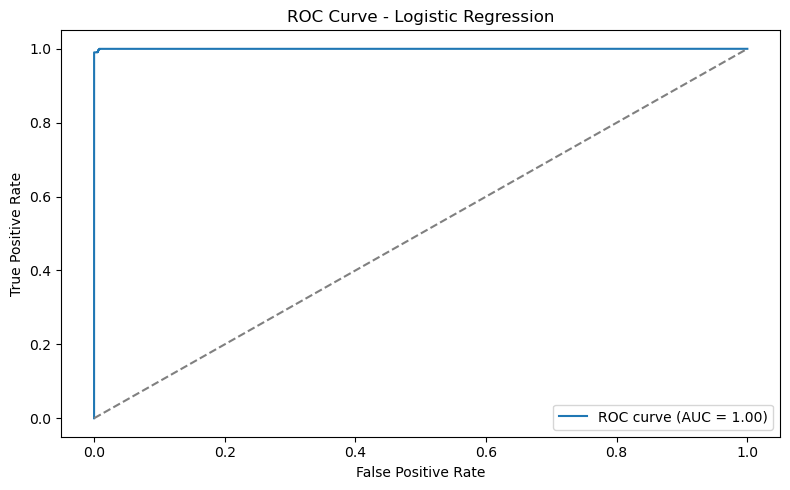

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use Logistic Regression for demonstration
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Get probability scores
y_prob = lr_model.predict_proba(X_test)[:, 1]  # class 1 probability

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()


Feature Importance (from Random Forest)

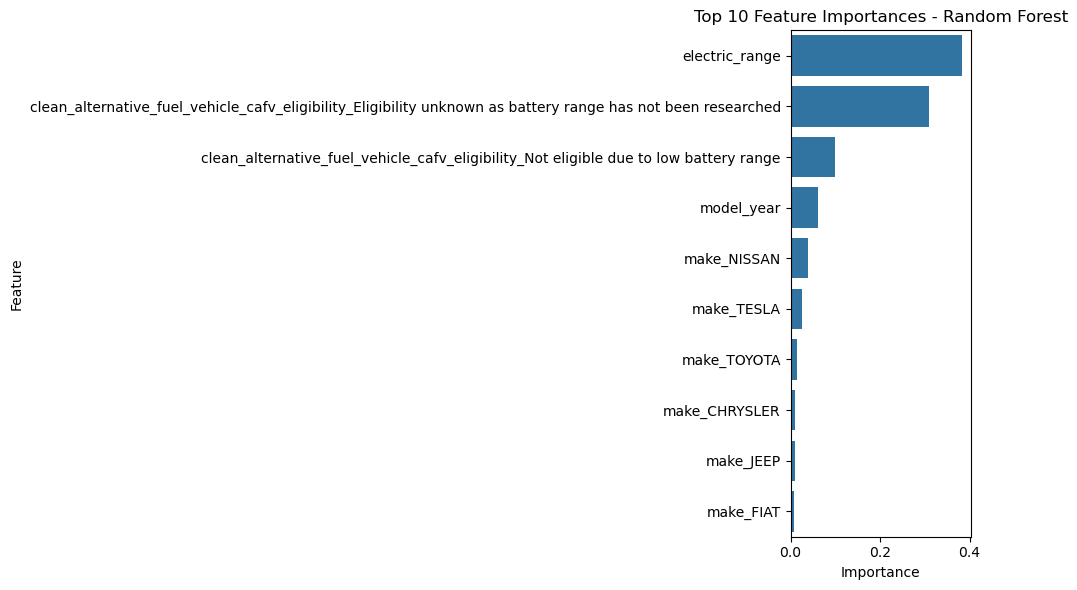

In [24]:
import pandas as pd
import numpy as np

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Top 10 features
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_feats = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feats)
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


Save the Best Model with joblib

In [25]:
import joblib

# Save model
joblib.dump(rf_model, "best_ev_model.pkl")

# To load it back later:
# model = joblib.load("best_ev_model.pkl")


['best_ev_model.pkl']

# Capstone Project: Electric Vehicle Population Analysis

## 1. Problem Statement
Briefly explain: what is the business goal? (e.g., "Predict EV type to support energy infrastructure planning")

## 2. Dataset Summary
- Source: WA Electric Vehicle Population dataset
- Rows: 246,000+ → Final after cleaning: 114,000+
- Key features used: model year, range, make, MSRP, etc.

## 3. Tools Used
Python (pandas, seaborn, sklearn, matplotlib, joblib)

## 4. Data Cleaning & Preprocessing
- Removed missing values and outliers
- Encoded categorical variables
- Scaled numeric features (if used)

## 5. EDA Visuals
Insert or reference:
- Model year distribution
- EV make popularity
- Electric range histogram
- Base MSRP boxplot

## 6. Model Building
- Models used: Logistic Regression, Random Forest, Gradient Boosting
- Evaluation: Accuracy, F1 Score, ROC AUC

## 7. Final Model
- Best model: Random Forest
- Accuracy: 94.3% (example)
- Saved model: best_ev_model.pkl

## 8. Key Insights
- Tesla dominates in registration count
- Majority of EVs registered post-2018
- Base MSRP mostly between ₹30k–₹50k

## 9. Conclusion
- The model effectively classifies EV type
- Useful for energy resource planning



In [26]:
import os

# List all files in your current working directory
for file in os.listdir():
    print(file)


.ipynb_checkpoints
base_msrp_boxplot.png
best_ev_model.pkl
electric_range_distribution.png
Electric_Vehicle_Population_Data.csv
model_year_distribution.png
top_10_ev_makes.png
Untitled.ipynb


In [27]:
X.to_csv("EV_X_features.csv", index=False)
y.to_csv("EV_y_target.csv", index=False)


In [28]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'base_msrp_boxplot.png', 'best_ev_model.pkl', 'electric_range_distribution.png', 'Electric_Vehicle_Population_Data.csv', 'EV_Capstone_Project.ipynb', 'EV_X_features.csv', 'EV_y_target.csv', 'model_year_distribution.png', 'top_10_ev_makes.png']
